In [1]:
import pandas as pd
from keras.utils import np_utils
df = pd.read_csv('train.csv')
X = df.drop(columns=['label'])
X = X.values / 255.0
y = df['label']
y = np_utils.to_categorical(y, 10)
print(X.shape, y.shape)

(60000, 784) (60000, 10)


Epoch 1/10
1407/1407 [==============================] - 1s 825us/step - loss: 0.8300 - accuracy: 0.8444 - val_loss: 0.4491 - val_accuracy: 0.9129
Epoch 2/10
1407/1407 [==============================] - 1s 739us/step - loss: 0.3801 - accuracy: 0.9215 - val_loss: 0.3266 - val_accuracy: 0.9293
Epoch 3/10
1407/1407 [==============================] - 1s 728us/step - loss: 0.3021 - accuracy: 0.9325 - val_loss: 0.2777 - val_accuracy: 0.9382
Epoch 4/10
1407/1407 [==============================] - 1s 714us/step - loss: 0.2644 - accuracy: 0.9384 - val_loss: 0.2500 - val_accuracy: 0.9421
Epoch 5/10
1407/1407 [==============================] - 1s 721us/step - loss: 0.2412 - accuracy: 0.9428 - val_loss: 0.2320 - val_accuracy: 0.9454
Epoch 6/10
1407/1407 [==============================] - 1s 708us/step - loss: 0.2251 - accuracy: 0.9455 - val_loss: 0.2186 - val_accuracy: 0.9483
Epoch 7/10
1407/1407 [==============================] - 1s 704us/step - loss: 0.2131 - accuracy: 0.9476 - val_loss: 0.2087 -

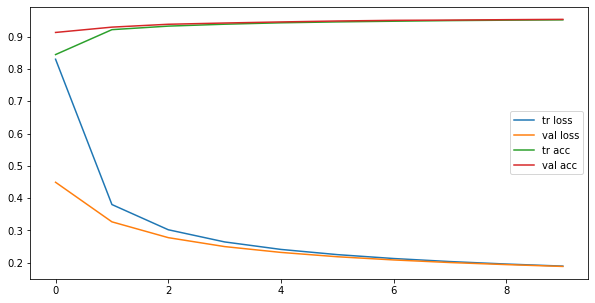

In [2]:
import keras
model = keras.Sequential([
    keras.Input(shape=(784)),
    #keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.summary())

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y)
res = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
model.save('model')

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(res.history["loss"], label="tr loss")
plt.plot(res.history["val_loss"], label="val loss")
plt.plot(res.history["accuracy"], label="tr acc")
plt.plot(res.history["val_accuracy"], label="val acc")
plt.legend()
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
flatten_3 (Flatten)          (None, 5760)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                57610     
Total params: 57,870
Trainable params: 57,870
Non-trainable params: 0
_________________________________________________________________
None
(45000, 28, 28, 1) (15000, 28, 28, 1)
Epoch 1/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3076 - accuracy: 0.9248 - val_loss: 0.1513 - val_accuracy: 0.9583
Epoch 2/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.1436 - accuracy: 0.9581 - val_loss: 0.1515 - val_accuracy: 0.9535
Epoch 3/5
1407/1407 [==============================

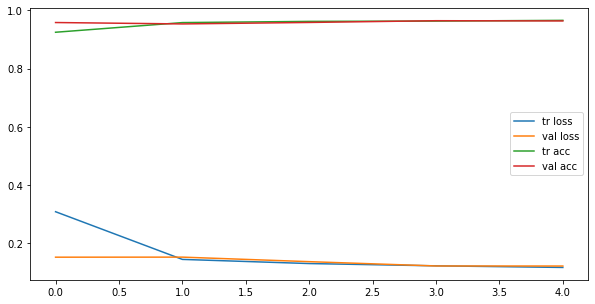

In [7]:
import keras
model = keras.Sequential([
    keras.layers.convolutional.Conv2D(filters=10, kernel_size=5, input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.summary())

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y)

X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32')
X_val = X_val.reshape((-1, 28, 28, 1)).astype('float32')
print(X_train.shape, X_val.shape)

res = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)
model.save('model')

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(res.history["loss"], label="tr loss")
plt.plot(res.history["val_loss"], label="val loss")
plt.plot(res.history["accuracy"], label="tr acc")
plt.plot(res.history["val_accuracy"], label="val acc")
plt.legend()
plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                14410     
Total params: 14,670
Trainable params: 14,670
Non-trainable params: 0
_________________________________________________________________
None
(45000, 28, 28, 1) (15000, 28, 28, 1)
Epoch 1/5
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3842 - accuracy: 0.9141 - val_loss: 0.1692 - val_accuracy: 0.9511
Epoch 2/5
1407/1407 [==============================] - 7s 5ms/

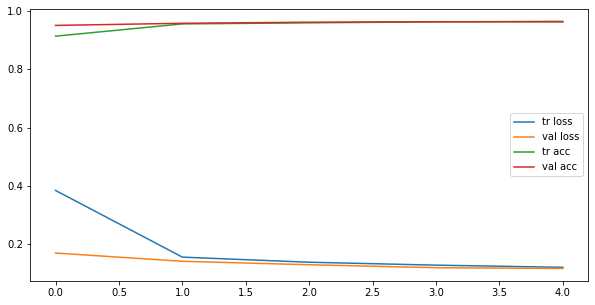

In [11]:
import keras
model = keras.Sequential([
    keras.layers.convolutional.Conv2D(filters=10, kernel_size=5, input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.summary())

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y)

X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32')
X_val = X_val.reshape((-1, 28, 28, 1)).astype('float32')
print(X_train.shape, X_val.shape)

res = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)
model.save('model')

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(res.history["loss"], label="tr loss")
plt.plot(res.history["val_loss"], label="val loss")
plt.plot(res.history["accuracy"], label="tr acc")
plt.plot(res.history["val_accuracy"], label="val acc")
plt.legend()
plt.show()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 5)         455       
_________________________________________________________________
flatten_9 (Flatten)          (None, 500)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5010      
Total params: 5,725
Trainable params: 5,725
Non-trainable params: 0
_________________________________________________________________
None
(45000, 28, 28, 1) (15000, 28, 28, 1)
Epoch 1/5
1407/1407 [==============================] - 9s 7ms/step - loss:

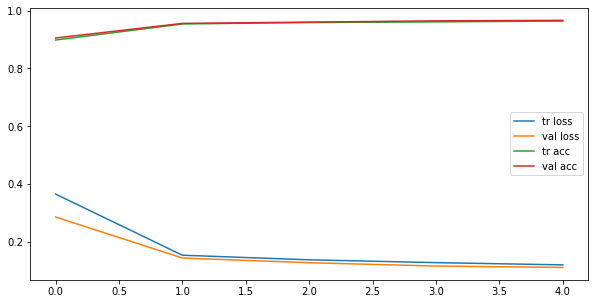

In [13]:
import keras
model = keras.Sequential([
    keras.layers.convolutional.Conv2D(filters=10, kernel_size=5, input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(),
    keras.layers.convolutional.Conv2D(filters=5, kernel_size=3, input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.summary())

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y)

X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32')
X_val = X_val.reshape((-1, 28, 28, 1)).astype('float32')
print(X_train.shape, X_val.shape)

res = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)
model.save('model')

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(res.history["loss"], label="tr loss")
plt.plot(res.history["val_loss"], label="val loss")
plt.plot(res.history["accuracy"], label="tr acc")
plt.plot(res.history["val_accuracy"], label="val acc")
plt.legend()
plt.show()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 5)           1255      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 5)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 80)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                810       
Total params: 2,165
Trainable params: 2,165
Non-trainable params: 0
___________________________________________________

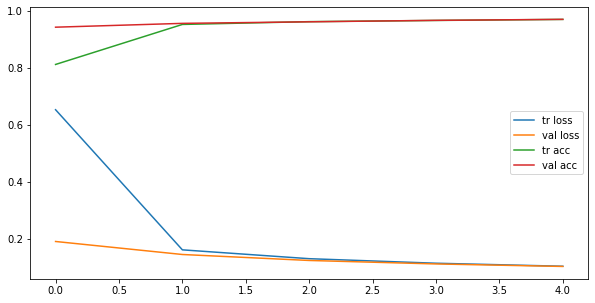

In [14]:
import keras
model = keras.Sequential([
    keras.layers.convolutional.Conv2D(filters=10, kernel_size=3, input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(),
    keras.layers.convolutional.Conv2D(filters=5, kernel_size=5, input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.summary())

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y)

X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32')
X_val = X_val.reshape((-1, 28, 28, 1)).astype('float32')
print(X_train.shape, X_val.shape)

res = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)
model.save('model')

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(res.history["loss"], label="tr loss")
plt.plot(res.history["val_loss"], label="val loss")
plt.plot(res.history["accuracy"], label="tr acc")
plt.plot(res.history["val_accuracy"], label="val acc")
plt.legend()
plt.show()